# Lesson 1 Basic Gradient Boosting Model Training

Hello and welcome! Today, we'll be diving into training a basic Gradient Boosting Model using financial data, specifically focusing on Tesla ($TSLA) stock prices. By the end of this lesson, you will understand how to implement gradient boosting for predictive analysis in stock trading within a Python framework.

Let's go!

## Quick Revision: Data Loading and Preparation

First, let's quickly revise how to load data and prepare it for machine learning:

```python
import pandas as pd
from sklearn.preprocessing import StandardScaler
import datasets

# Load dataset
tesla = datasets.load_dataset('codesignal/tsla-historic-prices')
tesla_df = pd.DataFrame(tesla['train'])

# Convert the column to `datetime`
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])

tesla_df['SMA_5'] = tesla_df['Adj Close'].rolling(window=5).mean()
tesla_df['SMA_10'] = tesla_df['Adj Close'].rolling(window=10).mean()
tesla_df['EMA_5'] = tesla_df['Adj Close'].ewm(span=5, adjust=False).mean()
tesla_df['EMA_10'] = tesla_df['Adj Close'].ewm(span=10, adjust=False).mean()

# Drop NaN values created by moving averages
tesla_df.dropna(inplace=True)

# Features and target selection
features = tesla_df[['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_5', 'SMA_10', 'EMA_5', 'EMA_10']].values
target = tesla_df['Adj Close'].values

# Standardizing features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
```

In this code we:

- Convert the 'Date' column to datetime format.
- Calculate SMA with windows of 5 and 10 days.
- Calculate EMA with spans of 5 and 10 days.
- Handle missing values resulting from moving averages.
- Select relevant features and the target variable.
- Standardize the feature values for better model performance.

## Training a Gradient Boosting Model

Now, let's move on to the core part of our lesson: training the Gradient Boosting Model.

First, we need to split the dataset into training and testing sets. Then, we instantiate a Gradient Boosting Regressor and fit the model to the training data.

Here is the necessary code to accomplish this:

```python
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.25, random_state=42)

# Instantiate and fit the model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)
```

## Evaluating Model Performance

Evaluating the model is crucial to understanding how well it performs. We will:

- Make predictions with the trained model.
- Calculate and print the Mean Squared Error (MSE) to the actual `y_test` values.

Here is how you can achieve this:

```python
from sklearn.metrics import mean_squared_error

# Predict and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)
```

The output of the above code will be:

```plaintext
Mean Squared Error: 0.4944244179351423
```

This output indicates the accuracy of our Gradient Boosting Model by providing the mean squared error between the actual and predicted stock prices. A lower MSE value suggests better predictive performance.

## Visualizing Predictions

Finally, let's visualize the actual vs predicted values to understand the performance of our model better:

We will plot the actual and predicted values using scatter plots. Here's the visualization code:

```python
import matplotlib.pyplot as plt

# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.7)
plt.scatter(range(len(y_test)), predictions, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()
```
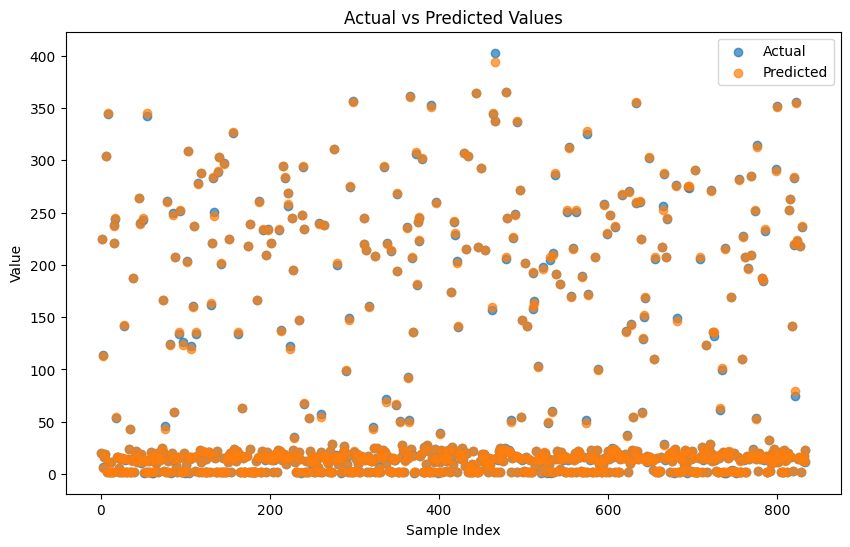

### Explanation:

- `plt.figure(figsize=(10, 6))`: Initializes a new figure with a specified size.
- `plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.7)`: Creates a scatter plot of the actual values.
- `plt.scatter(range(len(y_test)), predictions, label='Predicted', alpha=0.7)`: Creates a scatter plot of the predicted values for comparison.
- `plt.title('Actual vs Predicted Values')`: Sets the title of the plot.
- `plt.xlabel('Sample Index')`: Sets the x-axis label to 'Sample Index'.
- `plt.ylabel('Value')`: Sets the y-axis label to 'Value'.
- `plt.legend()`: Displays the legend to differentiate between actual and predicted values.
- `plt.show()`: Renders the plot to the screen.

## Lesson Summary

In this lesson, you learned how to train and evaluate a Gradient Boosting Regressor using Tesla ($TSLA) stock data. You've reviewed data preparation, added technical indicators, trained the model, evaluated it using MSE, and visualized the results.

By understanding and implementing these steps, you are better prepared to apply machine learning models to financial data for predictive analysis. Practice these steps to solidify your understanding and apply these concepts to enhance your trading strategies using machine learning.

---

This markdown version is organized and formatted for clarity, making it easy to follow and understand the content.

## Enhance Model by Adding the 'Close' Feature

## Debug and Fix the Gradient Boosting Model

## Fill in Missing Pieces for Model Training

## Complete Gradient Boosting Model Implementation

## Gradient Boosting Model Training with Tesla Data